The ***standard format*** strings control how a `numeric` type or `DateTime`/`DateTimeOffset` is converted to a ***string***.

***Standard format strings***  
A standard format string consists of a `single letter`, ***followed***, **optionally**, by `a digit`, an example is `C` or `F2`

***Custom format strings***  
With these, you micromanage every character with a `template`. An example is `0:#.000E+00`.

***Custom format strings*** are `unrelated` to ***custom format providers***.

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">
custom format strings به شما اجازه می‌دهند تا قالب‌بندی دقیق برای نمایش اعداد تعیین کنید، در حالی که custom format providers به شما امکان می‌دهند تا قالب‌بندی‌های پیچیده‌تر و سفارشی‌تری برای داده‌ها ایجاد کنید.
</div>

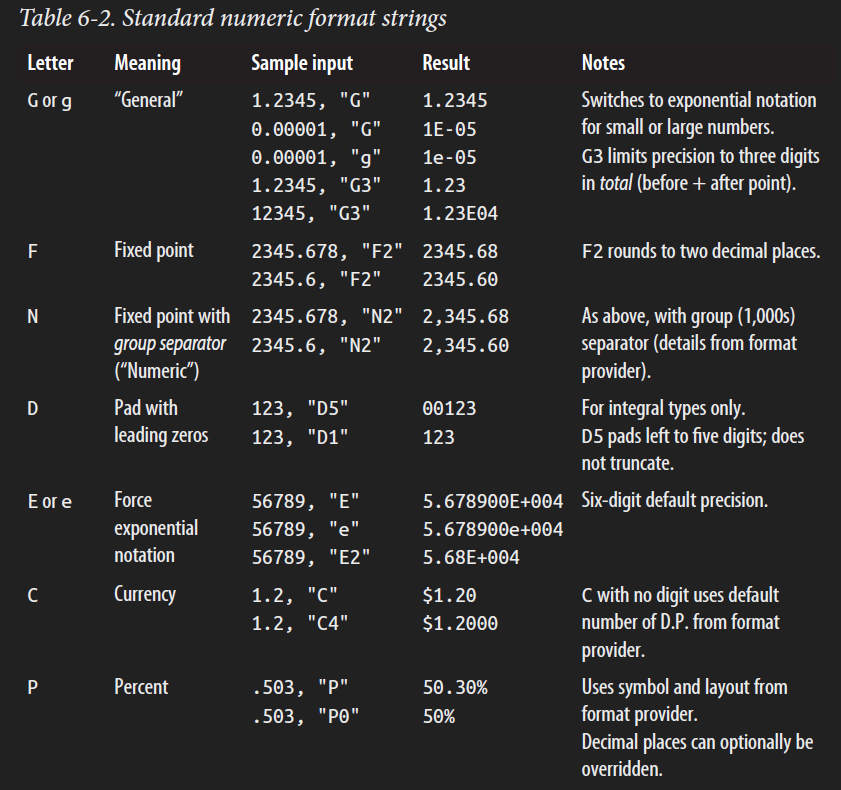
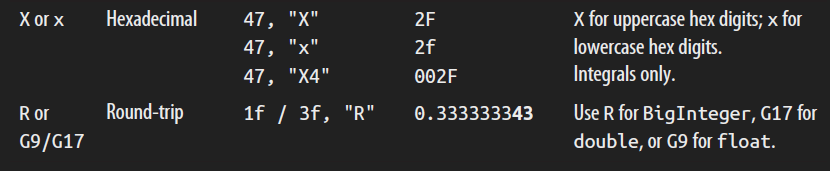

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">
<p>
زمانی که هیچ رشته قالب‌بندی عددی خاصی (format string) ارائه نمی‌دهید یا یک رشته null یا خالی را استفاده می‌کنید. این رفتار معادل استفاده از رشته قالب‌بندی استاندارد "G" (General) است، بدون تعیین هیچ عددی برای دقت.
</p>
<h5>رفتار قالب‌بندی "G" بدون عدد دقیق</h5>
<p>وقتی از "G" بدون عدد دقیق استفاده می‌کنید، C# به صورت زیر رفتار می‌کند:</p>
<ol><li><p><strong>اعداد کوچک‌تر از 10^(-4) یا بزرگ‌تر از دقت نوع داده:</strong>
اعداد بسیار کوچک (کمتر از 0.0001) یا بسیار بزرگ (بزرگ‌تر از محدوده دقت نوع داده) به صورت نمایی (scientific notation) نمایش داده می‌شوند. به عنوان مثال:</p><ul><li>عدد 0.0000123 به صورت 1.23E-05 نمایش داده می‌شود.</li><li>عدد 123456789 به صورت 1.23456789E+08 نمایش داده می‌شود.</li></ul></li><li><p><strong>اعدادی که در محدوده دقت نوع داده هستند:</strong></p><ul><li>اعدادی که در محدوده دقت نوع داده (مثلاً float یا double) قرار دارند، به صورت معمولی (بدون نمایی) نمایش داده می‌شوند.</li><li>به منظور پوشاندن ناهنجاری‌ها و نادرستی‌های احتمالی که ممکن است در تبدیل بین مبنای دودویی (binary) و دهدهی (decimal) وجود داشته باشد، دو رقم اعشار نهایی عدد گرد (round) می‌شوند. این کار باعث می‌شود تا دقت محاسبات حفظ شود و نتایج بهتری نمایش داده شوند.</li></ul></li></ol>
</div>

In [ ]:
double number1 = 0.0000123;
double number2 = 12345.6789;
double number3 = 123456789.0;

// استفاده از رشته قالب‌بندی null یا خالی
string formatted1 = number1.ToString();
string formatted2 = number2.ToString();
string formatted3 = number3.ToString();

// نتایج به صورت زیر خواهند بود
Console.WriteLine(formatted1); // "1.23E-05"
Console.WriteLine(formatted2); // "12345.6789"
Console.WriteLine(formatted3); // "1.23456789E+08"

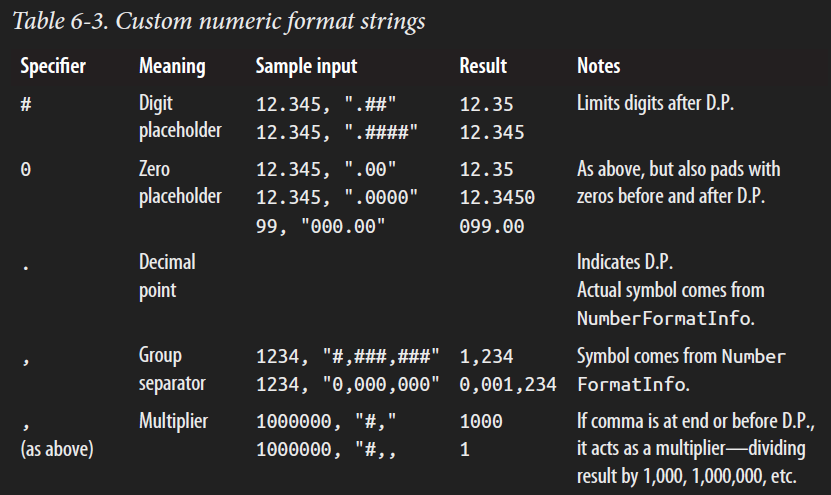
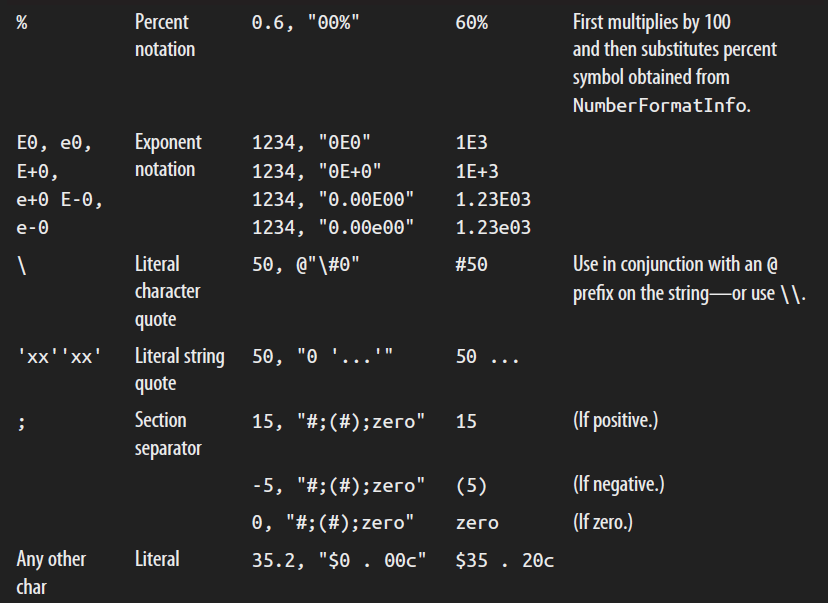

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">
<h5>کاراکتر <code>#</code></h5>
<ul><li><strong>نمایش رقم در صورت وجود:</strong> کاراکتر <code>#</code> نشان‌دهنده یک رقم اختیاری است. اگر در مکان مشخص شده توسط <code>#</code> یک رقم وجود داشته باشد، آن رقم نمایش داده می‌شود؛ در غیر این صورت، چیزی نمایش داده نمی‌شود.</li><li><strong>بدون نمایش صفر اضافی:</strong> <code>#</code> صفرها را به عنوان ارقام بی‌اهمیت در سمت چپ یا راست نمایش نمی‌دهد.</li></ul>

<h5>کاراکتر <code>0</code></h5>
<ul><li><strong>نمایش صفر در صورت عدم وجود رقم:</strong> کاراکتر <code>0</code> نشان‌دهنده یک رقم اجباری است. اگر در مکان مشخص شده توسط <code>0</code> یک رقم وجود نداشته باشد، یک صفر نمایش داده می‌شود.</li><li><strong>نمایش صفرهای اضافی:</strong> <code>0</code> همیشه صفرها را نمایش می‌دهد، حتی اگر در مکان مشخص شده هیچ رقمی وجود نداشته باشد.</li></ul>
</div>

In [ ]:
double number1 = 123.45;
Console.WriteLine(number1.ToString("###.##")); // نتیجه: "123.45"

Console.WriteLine(number1.ToString("###.####")); // نتیجه: "123.45"

Console.WriteLine(number1.ToString("000.00")); // نتیجه: "123.45"

Console.WriteLine(number1.ToString("0000.0000")); // نتیجه: "0123.4500"


<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">
<h4>کاراکتر <code>,</code></h4>
<p>در Custom numeric format strings در C#، کاراکتر <code>,</code> (کاما) برای چندین هدف مختلف استفاده می‌شود، که مهم‌ترین آن‌ها جداکننده هزارگان و مقیاس‌دهنده (scaling) است. بیایید به تفصیل به هر یک از این کاربردها بپردازیم:</p>
<h5>1. جداکننده هزارگان</h5>
<p>کاراکتر <code>,</code> به عنوان جداکننده هزارگان استفاده می‌شود تا اعداد بزرگ را به صورت خواناتر نمایش دهد. این کاربرد به شما اجازه می‌دهد تا اعداد بزرگ را با استفاده از کاما برای جدا کردن هزارگان، میلیون‌ها، میلیاردها و غیره نمایش دهید.</p>
</div>

In [2]:
double number = 0;

// استفاده از قالب‌بندی با جداکننده هزارگان
Console.WriteLine(number.ToString("#,##0")); // نتیجه: "1,234,567,890"

0


<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">
<ul><li><code>#</code> نشان‌دهنده یک رقم اختیاری است.</li><li><code>,</code> به عنوان جداکننده هزارگان استفاده می‌شود.</li><li><code>0</code> تضمین می‌کند که حداقل یک رقم نمایش داده شود.</li></ul>

<h5>2. مقیاس‌دهنده (Scaling)</h5>
<p>کاراکتر <code>,</code> همچنین می‌تواند به عنوان یک مقیاس‌دهنده استفاده شود که عدد را به طور خودکار در مضربی از 1000 تقسیم می‌کند. هر کاما در فرمت رشته باعث تقسیم عدد بر 1000 می‌شود.</p>

</div>

In [10]:
double number = 1000000;

// استفاده از قالب‌بندی با مقیاس‌دهنده
Console.WriteLine( number.ToString("#,##0,")); // نتیجه: "1,000"
Console.WriteLine( number.ToString("#,##0,,")); // نتیجه: "1"
Console.WriteLine(number.ToString("#,##0,,.0")); // نتیجه: "1.0"


1,000
1
1.0


#### `E0`, `e0`, `E+0`, `e+0` `E-0`, `e-0`

In [22]:
double number1 = 0.001234;
double number2 = 12345.6789;

Console.WriteLine(number1.ToString("0.00E0"));
Console.WriteLine(number2.ToString("0.00E0"));
Console.WriteLine(number1.ToString("0.00e0"));
Console.WriteLine(number2.ToString("0.00e0"));
Console.WriteLine("".PadLeft(20,'-'));
Console.WriteLine(number1.ToString("0.00E+0"));
Console.WriteLine(number2.ToString("0.00E+0"));
Console.WriteLine(number1.ToString("0.00e+0"));
Console.WriteLine(number2.ToString("0.00e+0"));
Console.WriteLine("".PadLeft(20,'-'));
Console.WriteLine(number1.ToString("0.00E-0"));
Console.WriteLine(number2.ToString("0.00E-0"));
Console.WriteLine(number1.ToString("0.00e-0"));
Console.WriteLine(number2.ToString("0.00e-0"));


1.23E-3
1.23E4
1.23e-3
1.23e4
--------------------
1.23E-3
1.23E+4
1.23e-3
1.23e+4
--------------------
1.23E-3
1.23E4
1.23e-3
1.23e4


### NumberStyles

Each ***numeric type*** defines a static `Parse` method that accepts a `NumberStyles` argument.  
  
***NumberStyles*** is a `flags enum` that lets you determine `how` the string is `read` as it’s `converted` to a `numeric type`.

- `AllowLeadingWhite` اجازه می‌دهد که فاصله‌های سفید (space) در ابتدای رشته عددی مجاز باشند.
- `AllowTrailingWhite`  اجازه می‌دهد که فاصله‌های سفید در انتهای رشته عددی مجاز باشند.
- `AllowLeadingSign`  اجازه می‌دهد که علامت مثبت یا منفی در ابتدای رشته عددی مجاز باشد.
- `AllowTrailingSign`   اجازه می‌دهد که علامت مثبت یا منفی در انتهای رشته عددی مجاز باشد (این حالت کمتر رایج است).
- `AllowParentheses`  اجازه می‌دهد که اعداد منفی با استفاده از پرانتز نمایش داده شوند.
- `AllowDecimalPoint`   اجازه می‌دهد که نقطه اعشار در رشته عددی مجاز باشد.
- `AllowThousands` اجازه می‌دهد که جداکننده هزارگان (کاما در برخی فرهنگ‌ها) در رشته عددی مجاز باشد.
- `AllowExponent`  اجازه می‌دهد که اعداد به صورت علمی (exponential) نمایش داده شوند.
- `AllowCurrencySymbol`  اجازه می‌دهد که نمادهای ارز (مثل $) در رشته عددی مجاز باشند.
- `AllowHexSpecifier`   اجازه می‌دهد که رشته عددی به صورت هگزادسیمال (پایه 16) باشد. توجه کنید که این گزینه نباید با دیگر گزینه‌های NumberStyles ترکیب شود.


***NumberStyles*** also defines these composite members:  
`None` `Integer` `Float` `Number` `HexNumber` `Currency` `Any`

***Except for None***, all composite values include `AllowLeadingWhite` and `AllowTrailingWhite`.

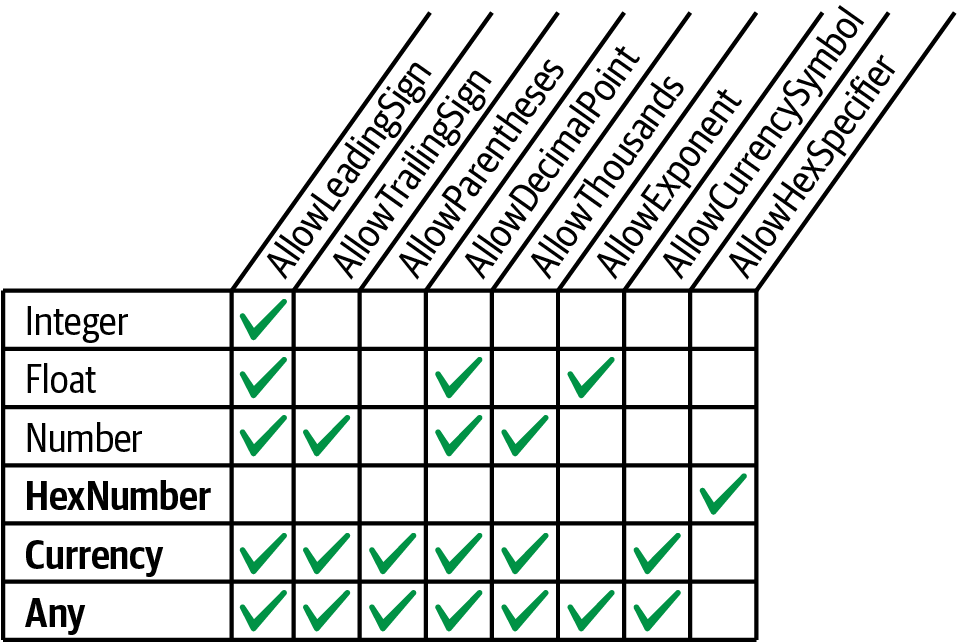

When you call `Parse` without specifying any flags, the `defaults` illustrated in below  
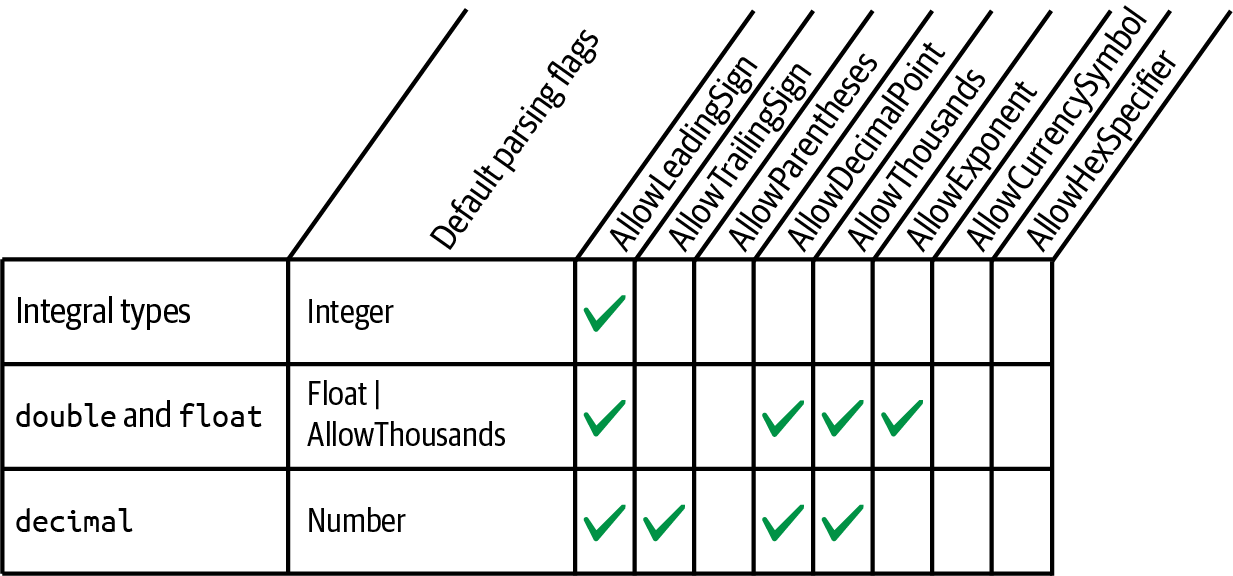

In [ ]:
using System.Globalization;

int thousand = int.Parse ("3E8", NumberStyles.HexNumber);
int minusTwo = int.Parse ("(2)", NumberStyles.Integer |
                                    NumberStyles.AllowParentheses);
                                    
double aMillion = double.Parse ("1,000,000", NumberStyles.Any);
decimal threeMillion = decimal.Parse ("3e6", NumberStyles.Any);
decimal fivePointTwo = decimal.Parse ("$5.20", NumberStyles.Currency);

Because ***we didn’t specify*** a `format provider`, this example works with `your local` **currency symbol**, **group separator**, **decimal point**, and so on.

In [ ]:
//for specific format provider;
using System.Globalization;

NumberFormatInfo ni = new NumberFormatInfo();
ni.CurrencySymbol = "€";
ni.CurrencyGroupSeparator = " ";
double million = double.Parse ("€1 000 000", NumberStyles.Currency, ni);